In [1]:
%matplotlib notebook
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
def get_mediciones_c02():
    desviacion_estandard=50
    
    error=np.random.normal(0,desviacion_estandard,num_mediciones)
    num_coches_mediciones=np.random.randint(0,max_coches,num_mediciones)
    co2_medido=(w_real*num_coches_mediciones+b_real)+error
    
    datos=np.column_stack((num_coches_mediciones,co2_medido))
    
    return datos



In [3]:
def plot_ecuation(axis,a,b,color):   
    num_coches_calculadas = np.linspace(0, max_coches, 1000)
    co2_ideal_calculadas=a*num_coches_calculadas+b
    
    datos=np.column_stack((num_coches_calculadas,co2_ideal_calculadas))
    axis.plot(datos[:,0],datos[:,1],color=color) 
    

<IPython.core.display.Javascript object>


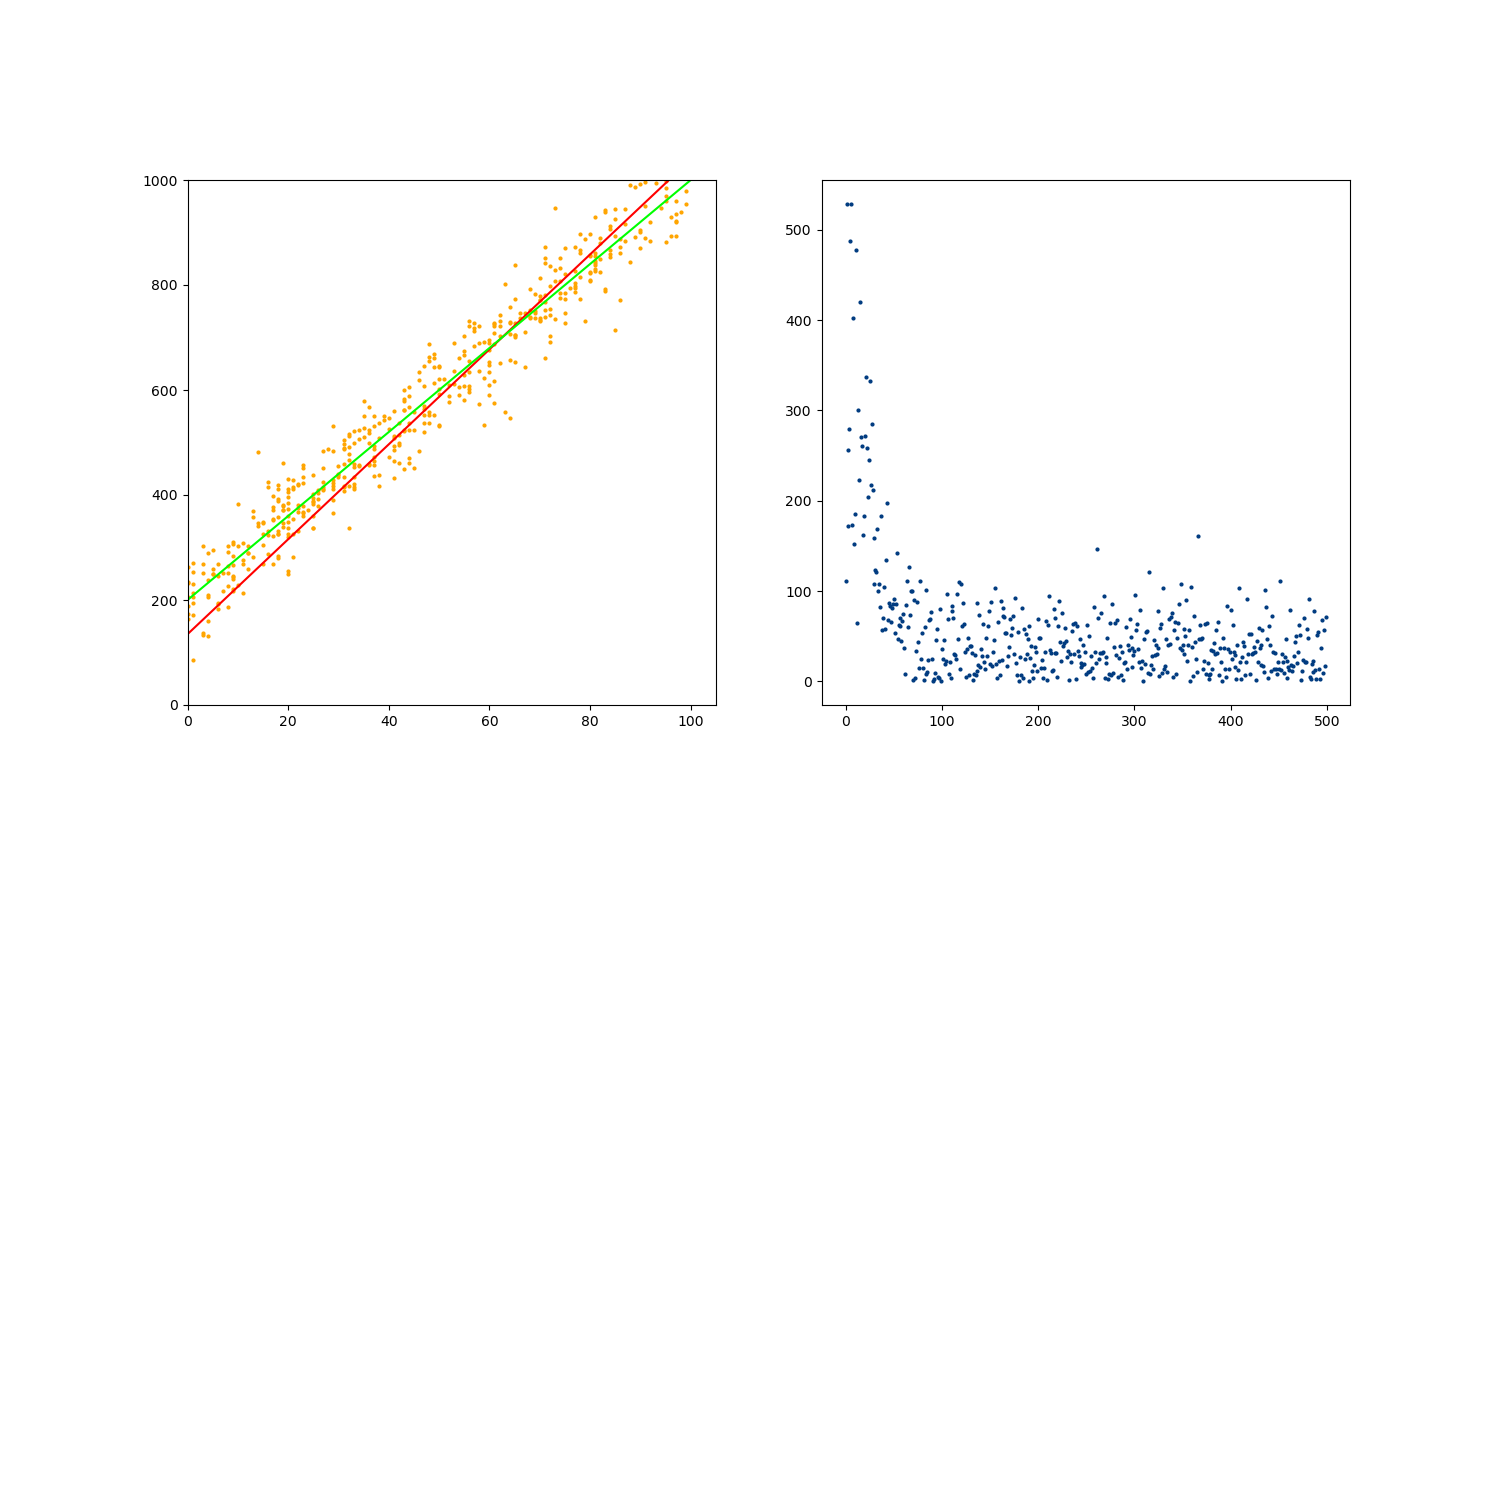

Real w= 8  b= 200
Calculado w= 9.043261806519357  b= 134.83142001928616
Error= [71.23291447]


In [7]:

def training(w,b,x,y,lr_w,lr_b,historial_coste):
    
    #Calculo de la neurora
    y_calculado=x*w+b
    
    #error
    coste=((y_calculado-y)**2)/2
    historial_coste=np.append(historial_coste,[[len(historial_coste),math.sqrt(coste)]], axis=0)
    
    #gradiente=valor derivada coste respecto w 
    gradiente_w=x*x*w+x*b-y*x
    #gradiente=valor derivada coste respecto b
    gradiente_b=b+x*w-y
    
    new_w=w-lr_w*gradiente_w
    new_b=b-lr_b*gradiente_b
    
    return new_w,new_b,historial_coste

max_coches=100
num_mediciones=500
w_real=8
b_real=200
w=np.random.randint(5)
b=np.random.randint(5)
historial_coste=np.empty(shape=[0, 2])
mediciones=get_mediciones_c02()


figure=plt.figure(figsize=(15, 15))
axis = figure.add_subplot(221)
axis_coste = figure.add_subplot(222)

for x,y in mediciones:
    
    w,b,historial_coste=training(w,b,x,y,0.00001,0.005,historial_coste)

    
    axis.cla()
    axis.plot(mediciones[:,0],mediciones[:,1],"o",markersize=2,color="orange")    
    plot_ecuation(axis,w,b,"#FF0000")
    plot_ecuation(axis,w_real,b_real,"#00FF00")
    axis.set_xlim(xmin=0)
    axis.set_ylim(ymin=0,ymax=1000)
    
    axis_coste.plot(historial_coste[-1:,0],historial_coste[-1:,1],"o-",markersize=2,color="#003B80")
    
    figure.canvas.draw()

print("Real w=",w_real," b=",b_real)
print("Calculado w=",w," b=",b)
print("Error=",historial_coste[-1:,1])